This is a good ( **99% correct**) prediction for so-so.csv Data (5 input and 1 output). this page made from this Colab Page:

> Indented block



https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-rnn-full-predict.ipynb#scrollTo=WJJcT-mZh915


In [1]:

# import os,sys

# sys.path.insert(0,'/content/')
# if not os.path.exists("/root/.ipython/ocr.py"):
#     from subprocess import run
#     from shlex import split

#     shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/ocr.py \
#                     -O /content/ocr.py"
#     run(split(shellCmd))
# from ocr import runSh

# def runShT(args):
#     return runSh(args, output=True)
# runShT('bash simple_shell_script.sh')

In [2]:
# %%writefile simple_shell_script2.sh
# Current_dir=$PWD
# echo "current dir is ${Current_dir}"
# # from google.colab import drive
# # drive.mount('/content/gdrive')
# # !cp '/content/gdrive/MyDrive/Amir Farzin Project/so-so.csv' /content/stock-prediction
# # !wget https://transfer.sh/o5273/so-so.csv
# echo "cd ${Current_dir}"
# cd ${Current_dir}//stock-prediction

# git clone https://github.com/So-AI-love/Test_NN
# unzip -o  "${Current_dir}/Test_NN/so-so.zip" -d "${Current_dir}/Test_NN"
# cp "${Current_dir}/Test_NN/so-so.csv" "${Current_dir}/"

In [3]:
!pwd 

/content


In [4]:
# runShT('bash simple_shell_script2.sh')

In [5]:
!pip install google-colab

In [6]:
from google.colab import files , drive
# files.upload()
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
import pandas as pd
# data_dir = "https://dlsun.github.io/pods/data/"
# df_ames = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")
# df_ames.head()

In [9]:

# df = pd.read_csv('so-so.csv')
# df=pd.read_csv('/home/so/Downloads/Telegram Desktop/Data_08_2020_input.csv')
# df2=pd.read_csv('/home/so/Downloads/Telegram Desktop/Data_08_2020_output - S.csv')

df=pd.read_csv('/content/gdrive/MyDrive/Amir Farzin Secure Data/Data_08_2020_input.csv')
df2=pd.read_csv('/content/gdrive/MyDrive/Amir Farzin Secure Data/Data_08_2020_output - S.csv')

df.head()
df2.head()


,Time,CO2
0,17-08-20 0:00,291.252600
1,17-08-20 0:01,291.656027
2,17-08-20 0:02,288.467146
3,17-08-20 0:03,282.867887
4,17-08-20 0:04,283.057879


In [10]:
df.head()


,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV
0,17-Aug-20 00:00:00,60.519039,60.491921,57.805900,3.317911,3.317911,21150.0,3.345023,3.345108,37228.85942,760.799988,761.044315,1.812243,760.200012,760.329042,1.795578,1.087846,1.087846,22.0,410.0,408.058692,69.331706,410.0,412.411950,65.635773,6000.0,5989.442423,11.809569,3554.202036,3554.202036,74.0,26.0,25.992372,92.594480,81.0,80.833493,33.525105,81.0,80.807097,35.470481,29.864918,18.835617,1101.628345,948.276040,0.377546,178.434269
1,17-Aug-20 00:01:00,60.519039,60.573661,57.791111,3.317911,3.317911,21150.0,3.341907,3.342012,37228.29533,760.799988,761.042964,1.812041,760.200012,760.323124,1.795520,1.087690,1.087690,22.0,410.0,408.532078,69.470408,410.0,412.140233,65.640992,6000.0,5990.331913,11.819274,3552.880731,3552.880731,74.0,26.0,25.999317,93.633696,81.0,80.913462,33.588194,81.0,80.536010,35.563675,29.863531,18.806534,1101.652565,948.227688,0.377306,178.422690
2,17-Aug-20 00:02:00,60.519039,60.525547,57.817259,3.317911,3.317911,21150.0,3.343107,3.343039,37243.92034,760.799988,761.041421,1.812067,760.200012,760.349170,1.795539,1.087369,1.087369,22.0,410.0,408.159187,69.575323,410.0,410.562369,65.731597,6000.0,5984.962090,11.842718,3545.332073,3545.332073,74.0,26.0,26.003898,93.751042,81.0,81.052741,33.730155,81.0,80.592873,35.613573,29.862143,18.804466,1101.737909,948.318011,0.377958,178.378130
3,17-Aug-20 00:03:00,60.519039,60.503820,57.830657,3.317911,3.317911,21150.0,3.342583,3.342583,37235.57606,760.799988,761.042077,1.812122,760.200012,760.366613,1.795609,1.085633,1.085633,22.0,410.0,408.659043,69.568745,410.0,410.050967,65.744806,6000.0,5986.416733,11.854616,3542.121978,3542.121978,74.0,26.0,25.999462,93.342203,81.0,80.893861,33.772829,81.0,81.011394,35.753719,29.860755,18.823079,1101.876815,948.502915,0.379097,178.333710
4,17-Aug-20 00:04:00,60.519039,60.520480,57.830769,3.317911,3.317911,21150.0,3.343532,3.343532,37234.87327,760.799988,761.036160,1.812037,760.200012,760.378198,1.795501,1.089943,1.089943,22.0,410.0,409.931374,69.595012,410.0,410.200509,65.740786,6000.0,5988.303974,11.866623,3536.746794,3536.746794,74.0,26.0,26.002769,91.878288,81.0,80.669406,33.801514,81.0,80.989015,35.764862,29.859368,18.810354,1101.977778,948.567782,0.379366,178.387372


In [11]:
print(df.shape);print(df2.shape)

(15840, 46)
(15840, 2)


In [12]:
import re, regex
ddd=df['Time'].str
# df['day_of_week']= ddd.split('.').str[-1]
# df['time']= ddd.split('.').str[0]
# df['day_of_week']=pd.to_datetime(df['day_of_week'], format='%H:%M', errors='ignore') #
# df=df[['Time','day_of_week','-1-','-2-','-3-','-4-','-5-','out']]
# df=df[['-1-','-2-','-3-','-4-','-5-','out']]
df['CO2']= df2['CO2']
df.head()

,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV,CO2
0,17-Aug-20 00:00:00,60.519039,60.491921,57.805900,3.317911,3.317911,21150.0,3.345023,3.345108,37228.85942,760.799988,761.044315,1.812243,760.200012,760.329042,1.795578,1.087846,1.087846,22.0,410.0,408.058692,69.331706,410.0,412.411950,65.635773,6000.0,5989.442423,11.809569,3554.202036,3554.202036,74.0,26.0,25.992372,92.594480,81.0,80.833493,33.525105,81.0,80.807097,35.470481,29.864918,18.835617,1101.628345,948.276040,0.377546,178.434269,291.252600
1,17-Aug-20 00:01:00,60.519039,60.573661,57.791111,3.317911,3.317911,21150.0,3.341907,3.342012,37228.29533,760.799988,761.042964,1.812041,760.200012,760.323124,1.795520,1.087690,1.087690,22.0,410.0,408.532078,69.470408,410.0,412.140233,65.640992,6000.0,5990.331913,11.819274,3552.880731,3552.880731,74.0,26.0,25.999317,93.633696,81.0,80.913462,33.588194,81.0,80.536010,35.563675,29.863531,18.806534,1101.652565,948.227688,0.377306,178.422690,291.656027
2,17-Aug-20 00:02:00,60.519039,60.525547,57.817259,3.317911,3.317911,21150.0,3.343107,3.343039,37243.92034,760.799988,761.041421,1.812067,760.200012,760.349170,1.795539,1.087369,1.087369,22.0,410.0,408.159187,69.575323,410.0,410.562369,65.731597,6000.0,5984.962090,11.842718,3545.332073,3545.332073,74.0,26.0,26.003898,93.751042,81.0,81.052741,33.730155,81.0,80.592873,35.613573,29.862143,18.804466,1101.737909,948.318011,0.377958,178.378130,288.467146
3,17-Aug-20 00:03:00,60.519039,60.503820,57.830657,3.317911,3.317911,21150.0,3.342583,3.342583,37235.57606,760.799988,761.042077,1.812122,760.200012,760.366613,1.795609,1.085633,1.085633,22.0,410.0,408.659043,69.568745,410.0,410.050967,65.744806,6000.0,5986.416733,11.854616,3542.121978,3542.121978,74.0,26.0,25.999462,93.342203,81.0,80.893861,33.772829,81.0,81.011394,35.753719,29.860755,18.823079,1101.876815,948.502915,0.379097,178.333710,282.867887
4,17-Aug-20 00:04:00,60.519039,60.520480,57.830769,3.317911,3.317911,21150.0,3.343532,3.343532,37234.87327,760.799988,761.036160,1.812037,760.200012,760.378198,1.795501,1.089943,1.089943,22.0,410.0,409.931374,69.595012,410.0,410.200509,65.740786,6000.0,5988.303974,11.866623,3536.746794,3536.746794,74.0,26.0,26.002769,91.878288,81.0,80.669406,33.801514,81.0,80.989015,35.764862,29.859368,18.810354,1101.977778,948.567782,0.379366,178.387372,283.057879


# Forecasting Time Series data

* Idea and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* Some code and approaches from: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
* Nice tutorial: https://www.tensorflow.org/beta/tutorials/text/time_series

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.xkcd()
# plt.style.use('ggplot')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)

https://ronakchhatbar.medium.com/box-cox-transformation-cba8263c5206
![enter image description here](https://i.stack.imgur.com/9PKEF.png)

In [14]:
# from scipy import stats
# import pandas as pd
# import numpy as np
# import pylab 
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats
# %matplotlib inline
# from scipy.stats import skew
# import numpy as np
# from sklearn.preprocessing import power_transform
# continuous= df.columns 
# continuous=['-1-','-2-','-3-','-4-','-5-','out']
# data_combine=df

# sns.distplot(df['-1-'])
# print("Skewness for the out Parameter:",skew(df['out']))
# sns.distplot(df['out'])
# print("Skewness for the -1- Parameter:",skew(df['-1-']))

# stats.probplot(df['-1-'], dist='norm', plot=pylab)
# pylab.show()
# stats.probplot(df['out'], dist='norm', plot=pylab)
# pylab.show()

# skewed_box_cox, lmda = stats.boxcox(abs(df['-1-']))
# sns.distplot(skewed_box_cox)

In [58]:
# From https://colab.research.google.com/github/khalidmeister/Customer-Segmentation-using-Python/blob/master/Customer%20Segmentation%20in%20Python.ipynb#scrollTo=wsjXuL-Evmo-

from scipy import stats
import seaborn as sns, numpy as np
from scipy import stats
import scipy
def analyze_skewness(customers_1,x):
    customers=abs(customers_1)
    fig, ax = plt.subplots(2, 2, figsize=(5,5));
    # print(customers)
    sns.distplot(customers[x], ax=ax[0,0]); #ax.set_title('Data'+ str(var)+'is :')
    sns.distplot(np.log(customers[x]), ax=ax[0,1]);#plt.title('Data'+ str(var)+'np.log is :')
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0]);#plt.title('Data'+ str(var)+'np.sqrt is :')
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1]); #plt.title('Data'+ str(var)+'stats.boxcox Trasnformation is :')
    plt.tight_layout()
    
    plt.show()
    
    print("Skewness for the ",x," Parameter:",customers[x].skew().round(2))
    print("Skewness for the ",x," Parameter by log mehtod is:",np.log(customers[x]).skew().round(2))
    print("Skewness for the ",x," Parameter by sqrt method is :",np.sqrt(customers[x]).skew().round(2))
    print("Skewness for the ",x," Parameter by BoxCox method is:",pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))
    skewed_box_cox, lmda = stats.boxcox(customers[x])
    return customers[x], skewed_box_cox, lmda

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

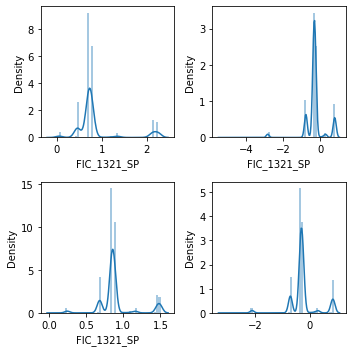

Skewness for the  FIC_1321_SP  Parameter: 2.0
Skewness for the  FIC_1321_SP  Parameter by log mehtod is: -1.17
Skewness for the  FIC_1321_SP  Parameter by sqrt method is : 1.24
Skewness for the  FIC_1321_SP  Parameter by BoxCox method is: 0.18
[ 0.89068919  0.89068919  0.89068919 ... -0.3301781  -0.41211426
 -1.42853863] 0.21534087501605795
[2.25879234 2.25879234 2.25879234 ... 0.70999034 0.64949494 0.18137766]
0        2.258792
1        2.258792
2        2.258792
3        2.258792
4        2.258792
           ...   
15835    0.709990
15836    0.709990
15837    0.709990
15838    0.649495
15839    0.181378
Name: FIC_1321_SP, Length: 15840, dtype: float64
Error for Skewness for the  FIC_1321_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

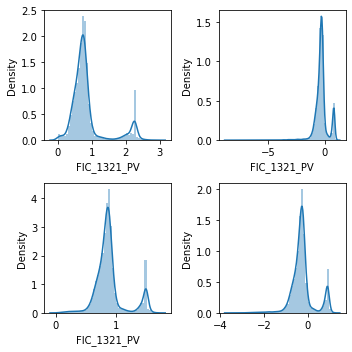

Skewness for the  FIC_1321_PV  Parameter: 1.85
Skewness for the  FIC_1321_PV  Parameter by log mehtod is: -1.71
Skewness for the  FIC_1321_PV  Parameter by sqrt method is : 1.07
Skewness for the  FIC_1321_PV  Parameter by BoxCox method is: 0.19
[ 0.90514033  0.89854578  0.90249321 ... -0.84895273 -0.85948409
 -0.83615603] 0.24641599979629067
[2.26386903 2.25168717 2.25897316 ... 0.38578586 0.38067397 0.39206677]
0        2.263869
1        2.251687
2        2.258973
3        2.262155
4        2.259721
           ...   
15835    0.602079
15836    0.513484
15837    0.385786
15838    0.380674
15839    0.392067
Name: FIC_1321_PV, Length: 15840, dtype: float64
Error for Skewness for the  FIC_1321_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

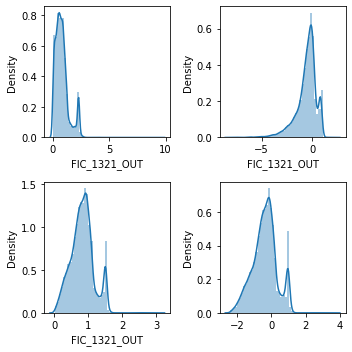

Skewness for the  FIC_1321_OUT  Parameter: 1.95
Skewness for the  FIC_1321_OUT  Parameter by log mehtod is: -1.64
Skewness for the  FIC_1321_OUT  Parameter by sqrt method is : 0.28
Skewness for the  FIC_1321_OUT  Parameter by BoxCox method is: -0.01
[0.96059135 0.96302697 0.95870193 ... 1.16737061 0.94229915 0.78214469] 0.4027599034444727
[2.25252639 2.25648431 2.24945892 ... 2.60346497 2.22293387 1.97374294]
0        2.252526
1        2.256484
2        2.249459
3        2.245810
4        2.245779
           ...   
15835    2.084041
15836    2.274385
15837    2.603465
15838    2.222934
15839    1.973743
Name: FIC_1321_OUT, Length: 15840, dtype: float64
Error for Skewness for the  FIC_1321_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

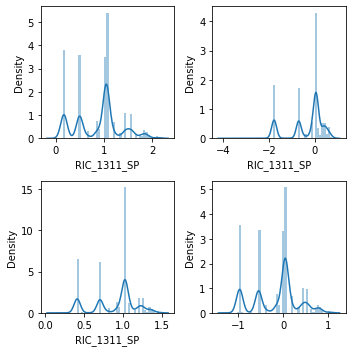

Skewness for the  RIC_1311_SP  Parameter: 0.03
Skewness for the  RIC_1311_SP  Parameter by log mehtod is: -0.99
Skewness for the  RIC_1311_SP  Parameter by sqrt method is : -0.52
Skewness for the  RIC_1311_SP  Parameter by BoxCox method is: -0.22
[0.53712144 0.53712144 0.53712144 ... 0.76891408 0.76891408 0.76891408] 0.7866180079479519
[1.56521377 1.56521377 1.56521377 ... 1.8245626  1.8245626  1.8245626 ]
0        1.565214
1        1.565214
2        1.565214
3        1.565214
4        1.565214
           ...   
15835    1.824563
15836    1.824563
15837    1.824563
15838    1.824563
15839    1.824563
Name: RIC_1311_SP, Length: 15840, dtype: float64
Error for Skewness for the  RIC_1311_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

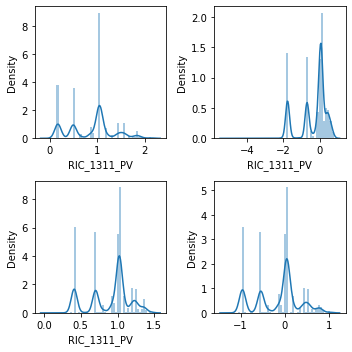

Skewness for the  RIC_1311_PV  Parameter: 0.03
Skewness for the  RIC_1311_PV  Parameter by log mehtod is: -1.02
Skewness for the  RIC_1311_PV  Parameter by sqrt method is : -0.52
Skewness for the  RIC_1311_PV  Parameter by BoxCox method is: -0.21
[0.53698664 0.53698664 0.53698664 ... 0.80977526 0.82043443 0.80406677] 0.7839306135066577
[1.56544221 1.56544221 1.56544221 ... 1.87198771 1.88420191 1.86545349]
0        1.565442
1        1.565442
2        1.565442
3        1.565442
4        1.565442
           ...   
15835    1.846710
15836    1.859492
15837    1.871988
15838    1.884202
15839    1.865453
Name: RIC_1311_PV, Length: 15840, dtype: float64
Error for Skewness for the  RIC_1311_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

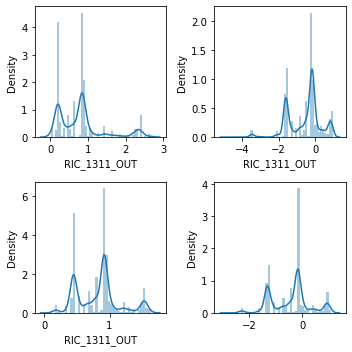

Skewness for the  RIC_1311_OUT  Parameter: 1.34
Skewness for the  RIC_1311_OUT  Parameter by log mehtod is: -0.63
Skewness for the  RIC_1311_OUT  Parameter by sqrt method is : 0.47
Skewness for the  RIC_1311_OUT  Parameter by BoxCox method is: -0.03
[0.96822324 0.96822324 0.96822324 ... 0.90068011 0.89367119 0.87178872] 0.2542641424189685
[2.37638855 2.37638855 2.37638855 ... 2.25016836 2.23736314 2.19773363]
0        2.376389
1        2.376389
2        2.376389
3        2.376389
4        2.376389
           ...   
15835    2.275835
15836    2.262992
15837    2.250168
15838    2.237363
15839    2.197734
Name: RIC_1311_OUT, Length: 15840, dtype: float64
Error for Skewness for the  RIC_1311_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

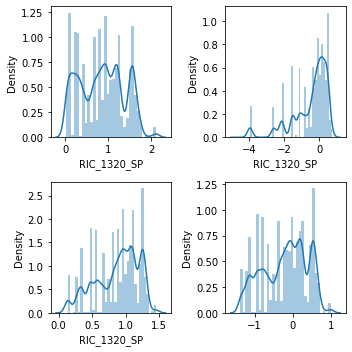

Skewness for the  RIC_1320_SP  Parameter: 0.04
Skewness for the  RIC_1320_SP  Parameter by log mehtod is: -1.58
Skewness for the  RIC_1320_SP  Parameter by sqrt method is : -0.55
Skewness for the  RIC_1320_SP  Parameter by BoxCox method is: -0.29
[ 0.53420275  0.52827373  0.53056832 ... -1.11686498 -1.11686498
 -1.11686498] 0.6947291782635242
[1.57510901 1.56830242 1.57093557 ... 0.11613617 0.11613617 0.11613617]
0        1.575109
1        1.568302
2        1.570936
3        1.569786
4        1.571864
           ...   
15835    0.116136
15836    0.116136
15837    0.116136
15838    0.116136
15839    0.116136
Name: RIC_1320_SP, Length: 15840, dtype: float64
Error for Skewness for the  RIC_1320_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

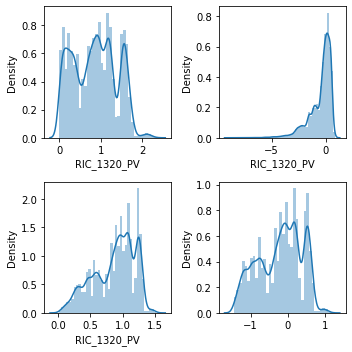

Skewness for the  RIC_1320_PV  Parameter: 0.06
Skewness for the  RIC_1320_PV  Parameter by log mehtod is: -1.85
Skewness for the  RIC_1320_PV  Parameter by sqrt method is : -0.55
Skewness for the  RIC_1320_PV  Parameter by BoxCox method is: -0.29
[ 0.53359174  0.5276904   0.52965745 ... -1.19858463 -1.10328029
 -1.02457095] 0.6870182495398658
[1.57553865 1.5687396  1.57100486 ... 0.08012508 0.1268153  0.17007727]
0        1.575539
1        1.568740
2        1.571005
3        1.570000
4        1.572089
           ...   
15835    0.156338
15836    0.107171
15837    0.080125
15838    0.126815
15839    0.170077
Name: RIC_1320_PV, Length: 15840, dtype: float64
Error for Skewness for the  RIC_1320_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Error for Skewness for the  RIC_1320_OUT  Parameter:
singular matrix


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encount

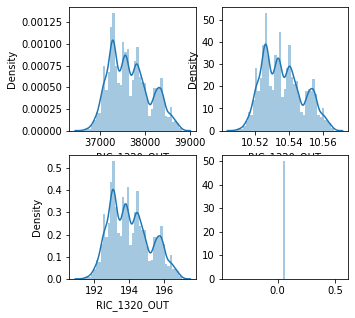

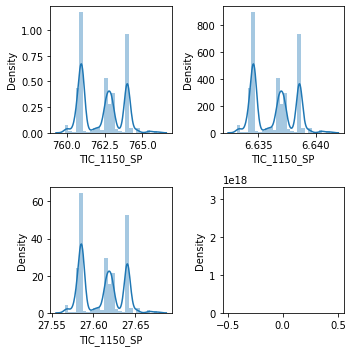

Skewness for the  TIC_1150_SP  Parameter: 0.14
Skewness for the  TIC_1150_SP  Parameter by log mehtod is: 0.14
Skewness for the  TIC_1150_SP  Parameter by sqrt method is : 0.14
Error for Skewness for the  TIC_1150_SP  Parameter:
'int' object has no attribute 'round'


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

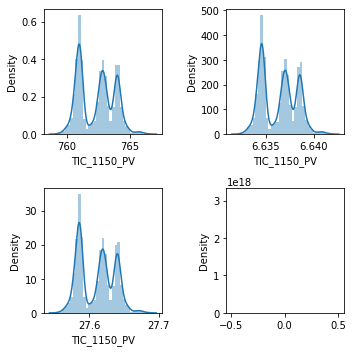

Skewness for the  TIC_1150_PV  Parameter: 0.12
Skewness for the  TIC_1150_PV  Parameter by log mehtod is: 0.12
Skewness for the  TIC_1150_PV  Parameter by sqrt method is : 0.12
Error for Skewness for the  TIC_1150_PV  Parameter:
'int' object has no attribute 'round'


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

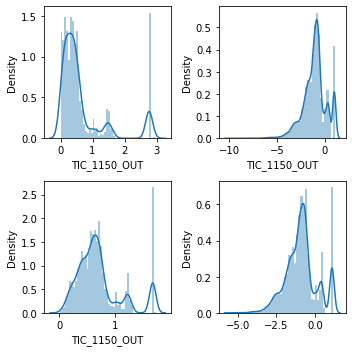

Skewness for the  TIC_1150_OUT  Parameter: 1.94
Skewness for the  TIC_1150_OUT  Parameter by log mehtod is: -0.71
Skewness for the  TIC_1150_OUT  Parameter by sqrt method is : 1.15
Skewness for the  TIC_1150_OUT  Parameter by BoxCox method is: 0.03
[-0.85533163 -0.8591997  -0.858706   ... -1.65072781 -1.6516092
 -1.64505604] 0.13751720393844685
[0.40253883 0.40077755 0.40100198 ... 0.15376146 0.15358623 0.15489325]
0        0.402539
1        0.400778
2        0.401002
3        0.401478
4        0.400743
           ...   
15835    0.148625
15836    0.151511
15837    0.153761
15838    0.153586
15839    0.154893
Name: TIC_1150_OUT, Length: 15840, dtype: float64
Error for Skewness for the  TIC_1150_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

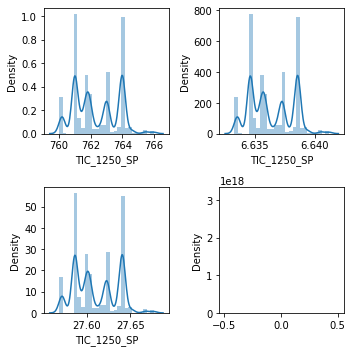

Skewness for the  TIC_1250_SP  Parameter: 0.23
Skewness for the  TIC_1250_SP  Parameter by log mehtod is: 0.23
Skewness for the  TIC_1250_SP  Parameter by sqrt method is : 0.23
Error for Skewness for the  TIC_1250_SP  Parameter:
'int' object has no attribute 'round'


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be remov

Error for Skewness for the  TIC_1250_PV  Parameter:
singular matrix


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

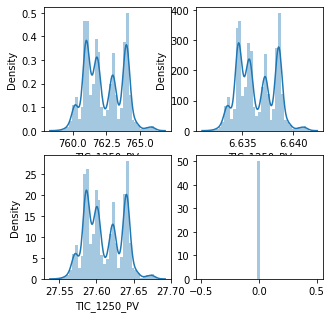

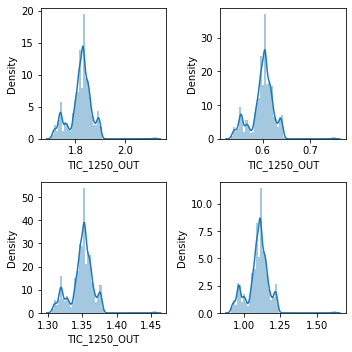

Skewness for the  TIC_1250_OUT  Parameter: -0.11
Skewness for the  TIC_1250_OUT  Parameter by log mehtod is: -0.27
Skewness for the  TIC_1250_OUT  Parameter by sqrt method is : -0.19
Skewness for the  TIC_1250_OUT  Parameter by BoxCox method is: 0.05
[1.05271631 1.05262167 1.05265196 ... 1.07771663 1.07804726 1.0785722 ] 1.841702663890056
[1.79557783 1.79552001 1.79553852 ... 1.81079856 1.81099913 1.81131754]
0        1.795578
1        1.795520
2        1.795539
3        1.795609
4        1.795501
           ...   
15835    1.809879
15836    1.810420
15837    1.810799
15838    1.810999
15839    1.811318
Name: TIC_1250_OUT, Length: 15840, dtype: float64
Error for Skewness for the  TIC_1250_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

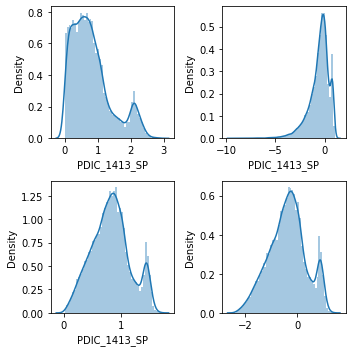

Skewness for the  PDIC_1413_SP  Parameter: 0.99
Skewness for the  PDIC_1413_SP  Parameter by log mehtod is: -1.57
Skewness for the  PDIC_1413_SP  Parameter by sqrt method is : 0.14
Skewness for the  PDIC_1413_SP  Parameter by BoxCox method is: -0.06
[0.81076934 0.81247688 0.81597686 ... 0.81180423 1.00414794 0.99765281] 0.4114686422935509
[2.01306091 2.01563939 2.02093063 ... 2.01462342 2.31752448 2.30688725]
0        2.013061
1        2.015639
2        2.020931
3        2.049255
4        1.978145
           ...   
15835    1.991481
15836    1.719474
15837    2.014623
15838    2.317524
15839    2.306887
Name: PDIC_1413_SP, Length: 15840, dtype: float64
Error for Skewness for the  PDIC_1413_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

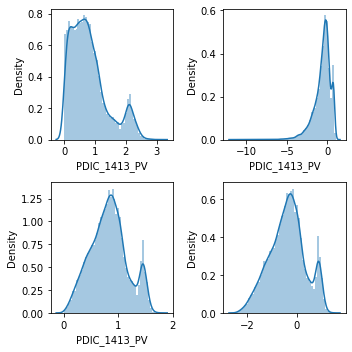

Skewness for the  PDIC_1413_PV  Parameter: 0.99
Skewness for the  PDIC_1413_PV  Parameter by log mehtod is: -1.58
Skewness for the  PDIC_1413_PV  Parameter by sqrt method is : 0.13
Skewness for the  PDIC_1413_PV  Parameter by BoxCox method is: -0.07
[0.81052578 0.81223245 0.81573066 ... 0.81183791 1.00404471 0.99755457] 0.41056600529433673
[2.01309817 2.015677   2.02096896 ... 2.01508065 2.31801602 2.30737758]
0        2.013098
1        2.015677
2        2.020969
3        2.049297
4        1.978177
           ...   
15835    1.991936
15836    1.719897
15837    2.015081
15838    2.318016
15839    2.307378
Name: PDIC_1413_PV, Length: 15840, dtype: float64
Error for Skewness for the  PDIC_1413_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

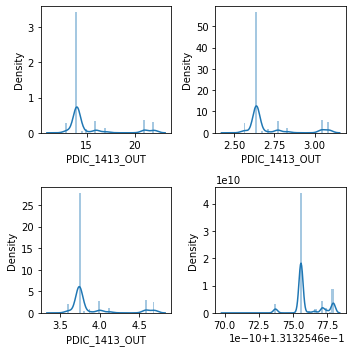

Skewness for the  PDIC_1413_OUT  Parameter: 1.85
Skewness for the  PDIC_1413_OUT  Parameter by log mehtod is: 1.75
Skewness for the  PDIC_1413_OUT  Parameter by sqrt method is : 1.8
Error for Skewness for the  PDIC_1413_OUT  Parameter:
'int' object has no attribute 'round'


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

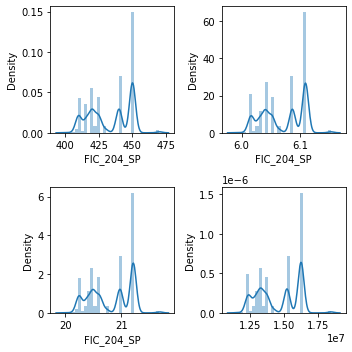

Skewness for the  FIC_204_SP  Parameter: -0.11
Skewness for the  FIC_204_SP  Parameter by log mehtod is: -0.14
Skewness for the  FIC_204_SP  Parameter by sqrt method is : -0.12
Skewness for the  FIC_204_SP  Parameter by BoxCox method is: -0.05
[12404508.52407402 12404508.52407402 12404508.52407402 ...
 13483578.5703641  13483578.5703641  13483578.5703641 ] 2.8914343165545042
[410. 410. 410. ... 422. 422. 422.]
0        410.0
1        410.0
2        410.0
3        410.0
4        410.0
         ...  
15835    422.0
15836    422.0
15837    422.0
15838    422.0
15839    422.0
Name: FIC_204_SP, Length: 15840, dtype: float64
Error for Skewness for the  FIC_204_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

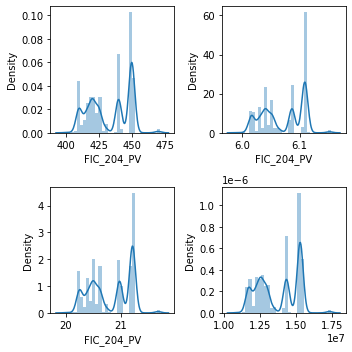

Skewness for the  FIC_204_PV  Parameter: -0.11
Skewness for the  FIC_204_PV  Parameter by log mehtod is: -0.14
Skewness for the  FIC_204_PV  Parameter by sqrt method is : -0.12
Skewness for the  FIC_204_PV  Parameter by BoxCox method is: -0.05
[11535888.94658811 11574487.17971474 11544075.93777651 ...
 12678037.55721111 12672137.16992271 12676885.11207089] 2.8810416391777753
[408.0586921 408.5320784 408.1591874 ... 421.6517748 421.583651
 421.6384707]
0        408.058692
1        408.532078
2        408.159187
3        408.659043
4        409.931374
            ...    
15835    422.159178
15836    421.717829
15837    421.651775
15838    421.583651
15839    421.638471
Name: FIC_204_PV, Length: 15840, dtype: float64
Error for Skewness for the  FIC_204_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

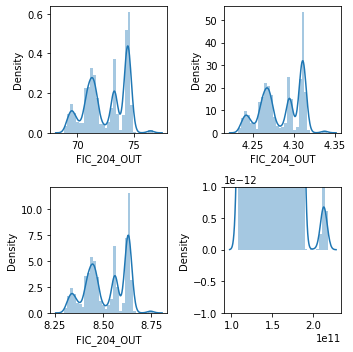

Skewness for the  FIC_204_OUT  Parameter: -0.22
Skewness for the  FIC_204_OUT  Parameter by log mehtod is: -0.24
Skewness for the  FIC_204_OUT  Parameter by sqrt method is : -0.23
Skewness for the  FIC_204_OUT  Parameter by BoxCox method is: -0.07
[1.12863791e+11 1.14326563e+11 1.15443631e+11 ... 1.28945793e+11
 1.29076078e+11 1.27709214e+11] 6.443292415749645
[69.33170627 69.47040767 69.57532305 ... 70.78000884 70.7911032
 70.67423366]
0        69.331706
1        69.470408
2        69.575323
3        69.568745
4        69.595012
           ...    
15835    70.722131
15836    70.738047
15837    70.780009
15838    70.791103
15839    70.674234
Name: FIC_204_OUT, Length: 15840, dtype: float64
Error for Skewness for the  FIC_204_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

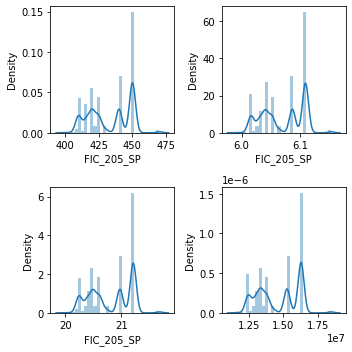

Skewness for the  FIC_205_SP  Parameter: -0.11
Skewness for the  FIC_205_SP  Parameter by log mehtod is: -0.14
Skewness for the  FIC_205_SP  Parameter by sqrt method is : -0.12
Skewness for the  FIC_205_SP  Parameter by BoxCox method is: -0.05
[12449194.15725976 12449194.15725976 12449194.15725976 ...
 13532398.97680765 13532398.97680765 13532398.97680765] 2.892068474898304
[410. 410. 410. ... 422. 422. 422.]
0        410.0
1        410.0
2        410.0
3        410.0
4        410.0
         ...  
15835    422.0
15836    422.0
15837    422.0
15838    422.0
15839    422.0
Name: FIC_205_SP, Length: 15840, dtype: float64
Error for Skewness for the  FIC_205_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

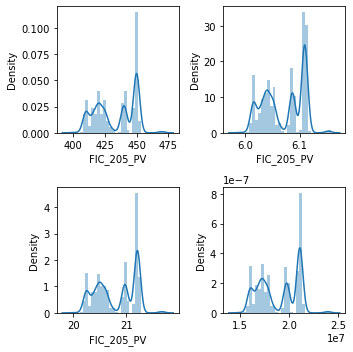

Skewness for the  FIC_205_PV  Parameter: -0.11
Skewness for the  FIC_205_PV  Parameter by log mehtod is: -0.14
Skewness for the  FIC_205_PV  Parameter by sqrt method is : -0.13
Skewness for the  FIC_205_PV  Parameter by BoxCox method is: -0.05
[16345723.72458817 16314113.95481879 16131352.23885449 ...
 17414453.94589223 17657409.12734256 17346497.00270644] 2.93703252584793
[412.4119497 412.1402327 410.5623694 ... 421.4017896 423.3943736
 420.8411661]
0        412.411950
1        412.140233
2        410.562369
3        410.050967
4        410.200509
            ...    
15835    420.660911
15836    421.565782
15837    421.401790
15838    423.394374
15839    420.841166
Name: FIC_205_PV, Length: 15840, dtype: float64
Error for Skewness for the  FIC_205_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

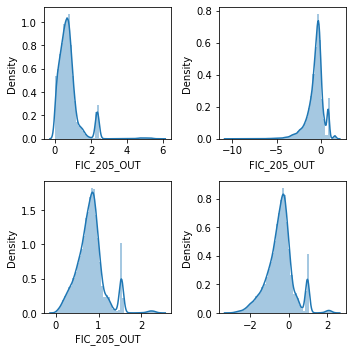

Skewness for the  FIC_205_OUT  Parameter: 2.79
Skewness for the  FIC_205_OUT  Parameter by log mehtod is: -1.58
Skewness for the  FIC_205_OUT  Parameter by sqrt method is : 0.82
Skewness for the  FIC_205_OUT  Parameter by BoxCox method is: 0.1
[ 1.0361605   1.03319672  0.98046139 ... -0.68495162 -0.15018134
 -0.05583293] 0.31696756127666037
[2.44974035 2.44427904 2.34848956 ... 0.46199926 0.85738047 0.94522443]
0        2.449740
1        2.444279
2        2.348490
3        2.334371
4        2.338673
           ...   
15835    0.846602
15836    0.472117
15837    0.461999
15838    0.857380
15839    0.945224
Name: FIC_205_OUT, Length: 15840, dtype: float64
Error for Skewness for the  FIC_205_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

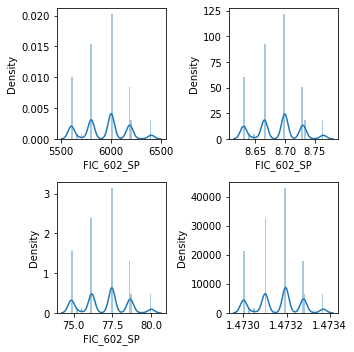

Skewness for the  FIC_602_SP  Parameter: 0.12
Skewness for the  FIC_602_SP  Parameter by log mehtod is: 0.05
Skewness for the  FIC_602_SP  Parameter by sqrt method is : 0.09
Skewness for the  FIC_602_SP  Parameter by BoxCox method is: 0.01
[1.47319583 1.47319583 1.47319583 ... 1.47332878 1.47332878 1.47332878] -0.6769159879308746
[6000. 6000. 6000. ... 6300. 6300. 6300.]
0        6000.0
1        6000.0
2        6000.0
3        6000.0
4        6000.0
          ...  
15835    6300.0
15836    6300.0
15837    6300.0
15838    6300.0
15839    6300.0
Name: FIC_602_SP, Length: 15840, dtype: float64
Error for Skewness for the  FIC_602_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

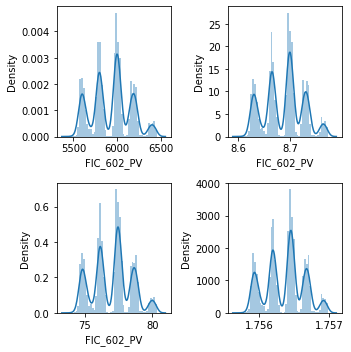

Skewness for the  FIC_602_PV  Parameter: 0.12
Skewness for the  FIC_602_PV  Parameter by log mehtod is: 0.04
Skewness for the  FIC_602_PV  Parameter by sqrt method is : 0.08
Skewness for the  FIC_602_PV  Parameter by BoxCox method is: 0.01
[1.75644201 1.7564431  1.75643652 ... 1.75676911 1.75676971 1.7567865 ] -0.565158865800584
[5989.442423 5990.331913 5984.96209  ... 6266.306783 6266.834063
 6281.590543]
0        5989.442423
1        5990.331913
2        5984.962090
3        5986.416733
4        5988.303974
            ...     
15835    6294.123243
15836    6270.218550
15837    6266.306783
15838    6266.834063
15839    6281.590543
Name: FIC_602_PV, Length: 15840, dtype: float64
Error for Skewness for the  FIC_602_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

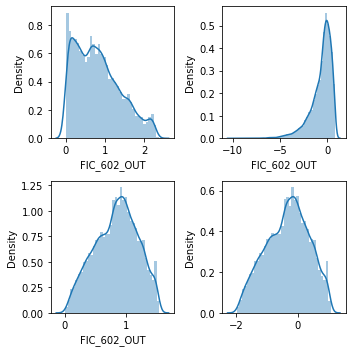

Skewness for the  FIC_602_OUT  Parameter: 0.58
Skewness for the  FIC_602_OUT  Parameter by log mehtod is: -1.74
Skewness for the  FIC_602_OUT  Parameter by sqrt method is : -0.18
Skewness for the  FIC_602_OUT  Parameter by BoxCox method is: -0.17
[-1.04146116 -1.06318008 -1.11757904 ... -0.11697729 -0.08788314
 -0.08457073] 0.5014435896914926
[0.22923315 0.21893047 0.19416231 ... 0.88643414 0.91404232 0.91721231]
0        0.229233
1        0.218930
2        0.194162
3        0.181655
4        0.169078
           ...   
15835    0.807624
15836    0.853579
15837    0.886434
15838    0.914042
15839    0.917212
Name: FIC_602_OUT, Length: 15840, dtype: float64
Error for Skewness for the  FIC_602_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

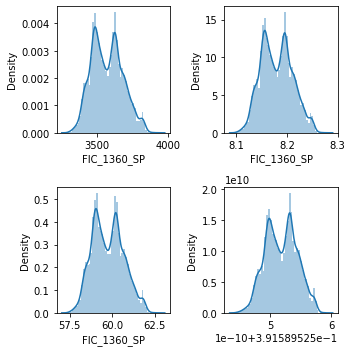

Skewness for the  FIC_1360_SP  Parameter: 0.23
Skewness for the  FIC_1360_SP  Parameter by log mehtod is: 0.17
Skewness for the  FIC_1360_SP  Parameter by sqrt method is : 0.2
Error for Skewness for the  FIC_1360_SP  Parameter:
'int' object has no attribute 'round'


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

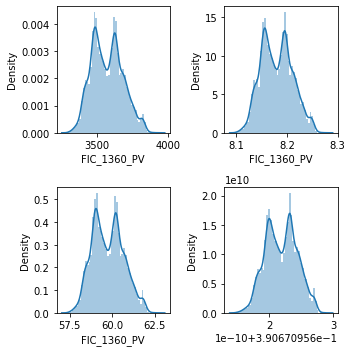

Skewness for the  FIC_1360_PV  Parameter: 0.23
Skewness for the  FIC_1360_PV  Parameter by log mehtod is: 0.17
Skewness for the  FIC_1360_PV  Parameter by sqrt method is : 0.2
Error for Skewness for the  FIC_1360_PV  Parameter:
'int' object has no attribute 'round'


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

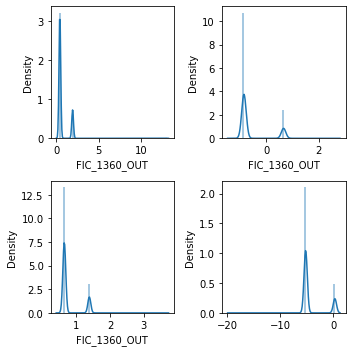

Skewness for the  FIC_1360_OUT  Parameter: 6.19
Skewness for the  FIC_1360_OUT  Parameter by log mehtod is: 1.69
Skewness for the  FIC_1360_OUT  Parameter by sqrt method is : 2.21
Skewness for the  FIC_1360_OUT  Parameter by BoxCox method is: 1.59
[-5.24364346 -5.24364346 -5.24364346 ...  0.26312027  0.26312027
  0.26312027] -3.3915722097319008
[0.42113773 0.42113773 0.42113773 ... 1.92956082 1.92956082 1.92956082]
0        0.421138
1        0.421138
2        0.421138
3        0.421138
4        0.421138
           ...   
15835    1.929561
15836    1.929561
15837    1.929561
15838    1.929561
15839    1.929561
Name: FIC_1360_OUT, Length: 15840, dtype: float64
Error for Skewness for the  FIC_1360_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Error for Skewness for the  PIC_329_SP  Parameter:
cannot convert float NaN to integer


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:908: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, 

Error for Skewness for the  PIC_329_PV  Parameter:
cannot convert float NaN to integer


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

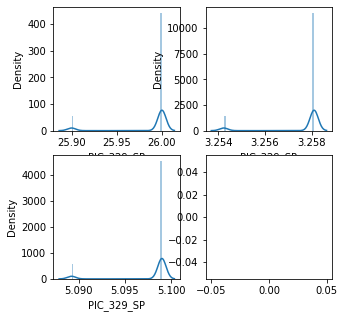

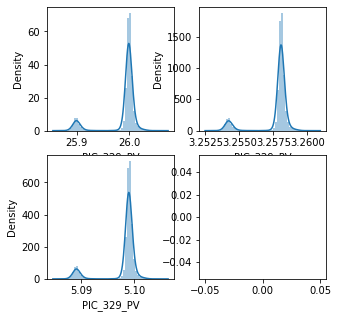

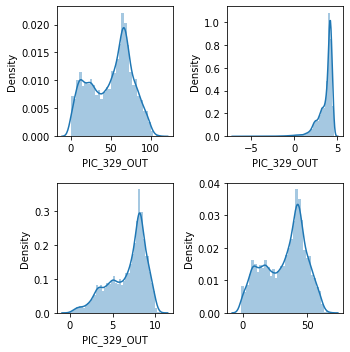

Skewness for the  PIC_329_OUT  Parameter: -0.23
Skewness for the  PIC_329_OUT  Parameter by log mehtod is: -2.49
Skewness for the  PIC_329_OUT  Parameter by sqrt method is : -0.79
Skewness for the  PIC_329_OUT  Parameter by BoxCox method is: -0.36
[57.3854603  57.95484579 58.01908642 ... 12.1318951  10.80740926
 10.84253738] 0.8672941809562719
[92.59448016 93.63369625 93.75104173 ... 16.74751026 14.83744238
 14.88769961]
0        92.594480
1        93.633696
2        93.751042
3        93.342203
4        91.878288
           ...    
15835    14.013538
15836    17.328869
15837    16.747510
15838    14.837442
15839    14.887700
Name: PIC_329_OUT, Length: 15840, dtype: float64
Error for Skewness for the  PIC_329_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

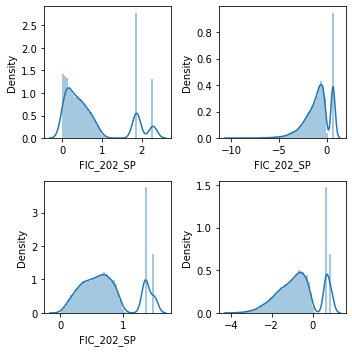

Skewness for the  FIC_202_SP  Parameter: 1.14
Skewness for the  FIC_202_SP  Parameter by log mehtod is: -1.0
Skewness for the  FIC_202_SP  Parameter by sqrt method is : 0.55
Skewness for the  FIC_202_SP  Parameter by BoxCox method is: -0.05
[0.90887001 0.90887001 0.90887001 ... 0.67171473 0.67171473 0.67171473] 0.23318228940760058
[2.28032255 2.28032255 2.28032255 ... 1.8664312  1.8664312  1.8664312 ]
0        2.280323
1        2.280323
2        2.280323
3        2.280323
4        2.280323
           ...   
15835    1.866431
15836    1.866431
15837    1.866431
15838    1.866431
15839    1.866431
Name: FIC_202_SP, Length: 15840, dtype: float64
Error for Skewness for the  FIC_202_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

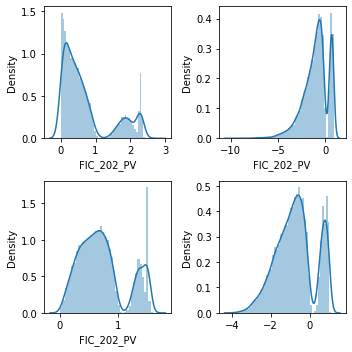

Skewness for the  FIC_202_PV  Parameter: 1.18
Skewness for the  FIC_202_PV  Parameter by log mehtod is: -0.97
Skewness for the  FIC_202_PV  Parameter by sqrt method is : 0.58
Skewness for the  FIC_202_PV  Parameter by BoxCox method is: -0.05
[0.92256915 0.91694641 0.90684264 ... 0.76397977 0.61190723 0.71530769] 0.22838227970114297
[2.30984751 2.29913929 2.27999348 ... 2.02221249 1.7731513  1.93973903]
0        2.309848
1        2.299139
2        2.279993
3        2.301783
4        2.331188
           ...   
15835    2.079005
15836    1.965658
15837    2.022212
15838    1.773151
15839    1.939739
Name: FIC_202_PV, Length: 15840, dtype: float64
Error for Skewness for the  FIC_202_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

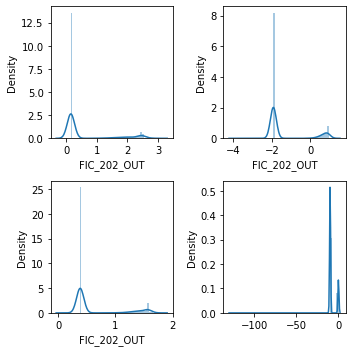

Skewness for the  FIC_202_OUT  Parameter: 1.59
Skewness for the  FIC_202_OUT  Parameter by log mehtod is: 1.47
Skewness for the  FIC_202_OUT  Parameter by sqrt method is : 1.51
Skewness for the  FIC_202_OUT  Parameter by BoxCox method is: -0.23
[ 0.52037313  0.51911901  0.51607025 ... -0.373938   -0.11775872
 -0.03710206] -1.3786443598543128
[2.50093828 2.48989749 2.46353428 ... 0.73965294 0.89662028 0.9644625 ]
0        2.500938
1        2.489897
2        2.463534
3        2.455179
4        2.449447
           ...   
15835    0.850552
15836    0.818353
15837    0.739653
15838    0.896620
15839    0.964463
Name: FIC_202_OUT, Length: 15840, dtype: float64
Error for Skewness for the  FIC_202_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

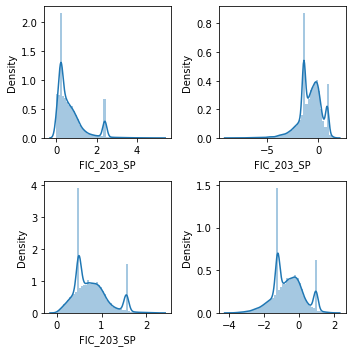

Skewness for the  FIC_203_SP  Parameter: 1.66
Skewness for the  FIC_203_SP  Parameter by log mehtod is: -0.99
Skewness for the  FIC_203_SP  Parameter by sqrt method is : 0.75
Skewness for the  FIC_203_SP  Parameter by BoxCox method is: 0.01
[ 0.97032724  0.97032724  0.97032724 ... -1.21341529 -1.21341529
 -1.21341529] 0.2202722345781624
[2.40940904 2.40940904 2.40940904 ... 0.24368916 0.24368916 0.24368916]
0        2.409409
1        2.409409
2        2.409409
3        2.409409
4        2.409409
           ...   
15835    0.243689
15836    0.243689
15837    0.243689
15838    0.243689
15839    0.243689
Name: FIC_203_SP, Length: 15840, dtype: float64
Error for Skewness for the  FIC_203_SP  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

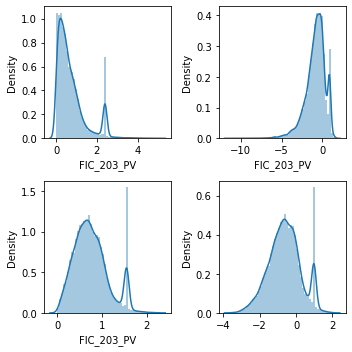

Skewness for the  FIC_203_PV  Parameter: 1.63
Skewness for the  FIC_203_PV  Parameter by log mehtod is: -1.27
Skewness for the  FIC_203_PV  Parameter by sqrt method is : 0.63
Skewness for the  FIC_203_PV  Parameter by BoxCox method is: -0.02
[ 0.99037183  0.99303433  0.99250206 ... -1.7637418  -2.19031108
 -0.66058638] 0.26801070252813214
[2.40696974 2.41203798 2.41102415 ... 0.09182023 0.0368918  0.48334061]
0        2.406970
1        2.412038
2        2.411024
3        2.402733
4        2.403216
           ...   
15835    0.094099
15836    0.210751
15837    0.091820
15838    0.036892
15839    0.483341
Name: FIC_203_PV, Length: 15840, dtype: float64
Error for Skewness for the  FIC_203_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

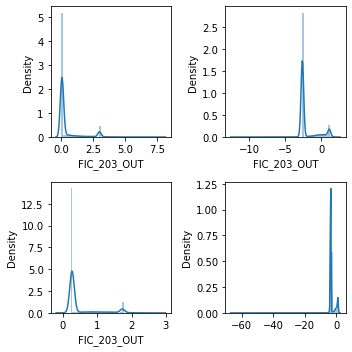

Skewness for the  FIC_203_OUT  Parameter: 2.56
Skewness for the  FIC_203_OUT  Parameter by log mehtod is: 1.71
Skewness for the  FIC_203_OUT  Parameter by sqrt method is : 2.14
Skewness for the  FIC_203_OUT  Parameter by BoxCox method is: -2.31
[0.97133023 0.97124734 0.97119473 ... 0.0121422  0.36191731 0.07182427] -0.233148641298479
[3.00829186 3.00796953 3.00776496 ... 1.01223364 1.45951467 1.07512018]
0        3.008292
1        3.007970
2        3.007765
3        3.007041
4        3.006972
           ...   
15835    1.510949
15836    1.304186
15837    1.012234
15838    1.459515
15839    1.075120
Name: FIC_203_OUT, Length: 15840, dtype: float64
Error for Skewness for the  FIC_203_OUT  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

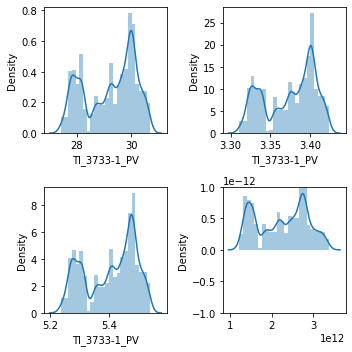

Skewness for the  TI_3733-1_PV  Parameter: -0.38
Skewness for the  TI_3733-1_PV  Parameter by log mehtod is: -0.41
Skewness for the  TI_3733-1_PV  Parameter by sqrt method is : -0.39
Skewness for the  TI_3733-1_PV  Parameter by BoxCox method is: -0.13
[2.64376945e+12 2.64265551e+12 2.64154200e+12 ... 1.41535516e+12
 1.41491411e+12 1.41447319e+12] 9.070082391207329
[29.86491829 29.86353068 29.86214308 ... 27.87683051 27.87587263
 27.87491475]
0        29.864918
1        29.863531
2        29.862143
3        29.860755
4        29.859368
           ...    
15835    27.878746
15836    27.877788
15837    27.876831
15838    27.875873
15839    27.874915
Name: TI_3733-1_PV, Length: 15840, dtype: float64
Error for Skewness for the  TI_3733-1_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

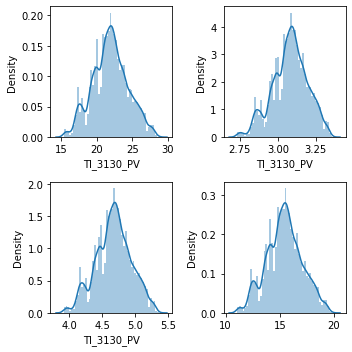

Skewness for the  TI_3130_PV  Parameter: 0.03
Skewness for the  TI_3130_PV  Parameter by log mehtod is: -0.27
Skewness for the  TI_3130_PV  Parameter by sqrt method is : -0.12
Skewness for the  TI_3130_PV  Parameter by BoxCox method is: -0.01
[13.40617981 13.38679562 13.38541647 ... 15.31335179 15.3020305
 15.21793577] 0.8617819070895659
[18.83561657 18.80653442 18.80446551 ... 21.72626418 21.70893941
 21.58031062]
0        18.835617
1        18.806534
2        18.804466
3        18.823079
4        18.810354
           ...    
15835    21.823075
15836    21.764752
15837    21.726264
15838    21.708939
15839    21.580311
Name: TI_3130_PV, Length: 15840, dtype: float64
Error for Skewness for the  TI_3130_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

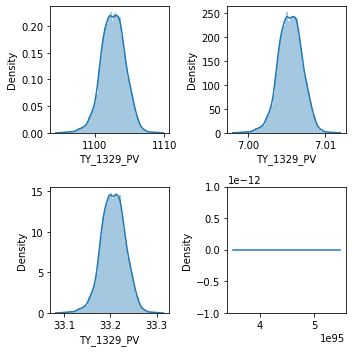

Skewness for the  TY_1329_PV  Parameter: -0.16
Skewness for the  TY_1329_PV  Parameter by log mehtod is: -0.17
Skewness for the  TY_1329_PV  Parameter by sqrt method is : -0.16
Skewness for the  TY_1329_PV  Parameter by BoxCox method is: 0.0
[4.33890465e+95 4.34195189e+95 4.35270602e+95 ... 4.80193934e+95
 4.75310854e+95 4.77128951e+95] 31.9331033273594
[1101.628345 1101.652565 1101.737909 ... 1105.131931 1104.778261
 1104.910351]
0        1101.628345
1        1101.652565
2        1101.737909
3        1101.876815
4        1101.977778
            ...     
15835    1104.026455
15836    1104.811648
15837    1105.131931
15838    1104.778261
15839    1104.910351
Name: TY_1329_PV, Length: 15840, dtype: float64
Error for Skewness for the  TY_1329_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

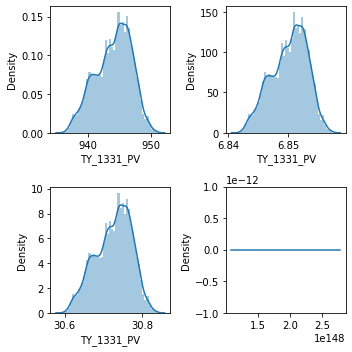

Skewness for the  TY_1331_PV  Parameter: -0.33
Skewness for the  TY_1331_PV  Parameter by log mehtod is: -0.33
Skewness for the  TY_1331_PV  Parameter by sqrt method is : -0.33
Skewness for the  TY_1331_PV  Parameter by BoxCox method is: nan
[2.30702525e+148 2.30110292e+148 2.31217816e+148 ... 1.79576539e+148
 1.83104103e+148 1.80624087e+148] 50.40942287712521
[948.27604   948.2276885 948.3180109 ... 943.5749359 943.9391382
 943.6838165]
0        948.276040
1        948.227688
2        948.318011
3        948.502915
4        948.567782
            ...    
15835    943.072629
15836    943.158403
15837    943.574936
15838    943.939138
15839    943.683816
Name: TY_1331_PV, Length: 15840, dtype: float64
Error for Skewness for the  TY_1331_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:908: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dis

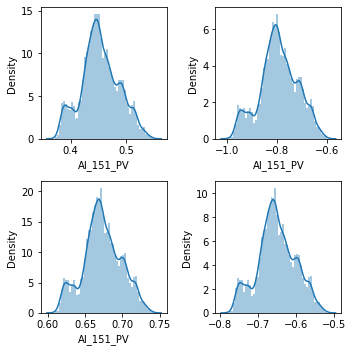

Skewness for the  AI_151_PV  Parameter: 0.09
Skewness for the  AI_151_PV  Parameter by log mehtod is: -0.1
Skewness for the  AI_151_PV  Parameter by sqrt method is : -0.01
Skewness for the  AI_151_PV  Parameter by BoxCox method is: -0.0
[-0.76624539 -0.76663078 -0.76558542 ... -0.58703695 -0.5906932
 -0.59171823] 0.5141369544527329
[0.37754641 0.37730636 0.37795766 ... 0.49718573 0.49458538 0.49385756]
0        0.377546
1        0.377306
2        0.377958
3        0.379097
4        0.379366
           ...   
15835    0.500762
15836    0.500736
15837    0.497186
15838    0.494585
15839    0.493858
Name: AI_151_PV, Length: 15840, dtype: float64
Error for Skewness for the  AI_151_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

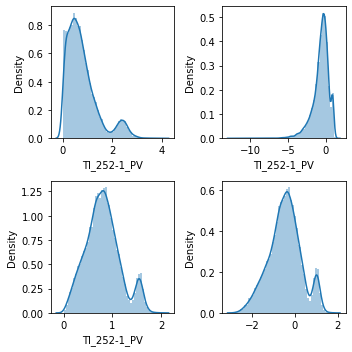

Skewness for the  TI_252-1_PV  Parameter: 1.4
Skewness for the  TI_252-1_PV  Parameter by log mehtod is: -1.6
Skewness for the  TI_252-1_PV  Parameter by sqrt method is : 0.38
Skewness for the  TI_252-1_PV  Parameter by BoxCox method is: -0.02
[0.95071596 0.96070419 0.9983007  ... 1.23025894 1.23448203 1.20251811] 0.3514891982534472
[2.27105239 2.28809591 2.35299243 ... 2.77989535 2.78809894 2.7263963 ]
0        2.271052
1        2.288096
2        2.352992
3        2.416603
4        2.339622
           ...   
15835    3.412528
15836    3.095528
15837    2.779895
15838    2.788099
15839    2.726396
Name: TI_252-1_PV, Length: 15840, dtype: float64
Error for Skewness for the  TI_252-1_PV  Parameter:
Must have equal len keys and value when setting with an iterable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

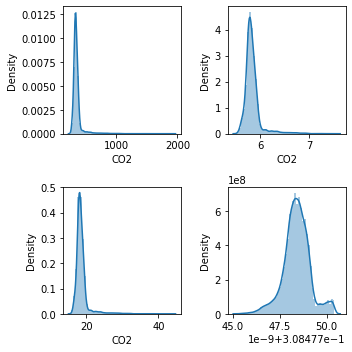

Skewness for the  CO2  Parameter: 6.5
Skewness for the  CO2  Parameter by log mehtod is: 3.44
Skewness for the  CO2  Parameter by sqrt method is : 4.66
Error for Skewness for the  CO2  Parameter:
'int' object has no attribute 'round'


In [59]:
#https://colab.research.google.com/github/jhihan/Housing_Price_Kaggle/blob/master/Housing_Price.ipynb#scrollTo=6BggFAsxMVk3
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import power_transform
cols_plot = df.columns #['-1-', '-2-', 'out']
data_combine=df;continuous= df.columns;#print(data_combine.columns[-1:])
j=0;
for var in continuous:
  try:
    if j==0:
      j=1;
    else:

      data_main, skewed_box_cox, lmda=analyze_skewness((data_combine[data_combine.columns[1:]]),var);
      print(skewed_box_cox, lmda);
      print(scipy.special.inv_boxcox(skewed_box_cox, lmda))
      print(data_main);
      data_combine[data_combine.columns[1:]]=data_main;
      df[df.columns[1:]]=data_combine[data_combine.columns[1:]];
      skewness=skew(data_combine[var])
      print(skewness)
      if abs(skewness) > 0.5:
        print(skew(data_combine[var]))
        print(var,"too large")
        data_combine[var]=power_transform(data_combine[var].values.reshape(-1, 1), method='box-cox')
        # data_combine[var]=np.log1p(data_combine[var]+1e-99)
        print(skew(data_combine[var]))
        print(var,"after transformed")
  except Exception as e:       
       print("Error for Skewness for the ",var," Parameter:");print(e)


 

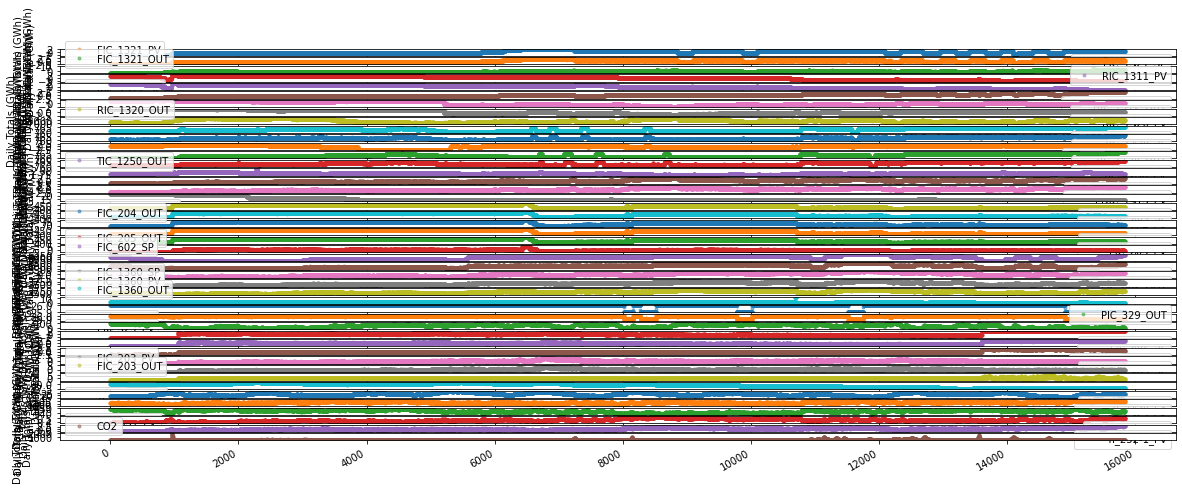

In [60]:
cols_plot = df.columns #['-1-', '-2-', 'out']

axes = data_combine[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [66]:
import pandas as pd
import numpy as np

In [67]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

# time_series_df = pd.read_csv(url, 
#                              sep=',', 
#                              index_col=0, # you can use the date as the index for pandas
#                              parse_dates=[0]) # where is the time stamp?

time_series_df=df;


In [68]:
time_series_df.head()

,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV,CO2
0,17-Aug-20 00:00:00,-2.258792,-2.263869,-2.252526,1.565214,1.565442,-2.376389,1.575109,1.575539,37228.85942,760.799988,761.044315,0.402539,760.200012,760.329042,1.795578,-2.013061,-2.013098,22.0,410.0,408.058692,69.331706,410.0,412.411950,-2.449740,6000.0,5989.442423,-0.229233,3554.202036,3554.202036,0.421138,26.0,25.992372,92.594480,-2.280323,-2.309848,-2.500938,-2.409409,-2.406970,-3.008292,29.864918,18.835617,1101.628345,948.276040,0.377546,-2.271052,291.252600
1,17-Aug-20 00:01:00,-2.258792,-2.251687,-2.256484,1.565214,1.565442,-2.376389,1.568302,1.568740,37228.29533,760.799988,761.042964,0.400778,760.200012,760.323124,1.795520,-2.015639,-2.015677,22.0,410.0,408.532078,69.470408,410.0,412.140233,-2.444279,6000.0,5990.331913,-0.218930,3552.880731,3552.880731,0.421138,26.0,25.999317,93.633696,-2.280323,-2.299139,-2.489897,-2.409409,-2.412038,-3.007970,29.863531,18.806534,1101.652565,948.227688,0.377306,-2.288096,291.656027
2,17-Aug-20 00:02:00,-2.258792,-2.258973,-2.249459,1.565214,1.565442,-2.376389,1.570936,1.571005,37243.92034,760.799988,761.041421,0.401002,760.200012,760.349170,1.795539,-2.020931,-2.020969,22.0,410.0,408.159187,69.575323,410.0,410.562369,-2.348490,6000.0,5984.962090,-0.194162,3545.332073,3545.332073,0.421138,26.0,26.003898,93.751042,-2.280323,-2.279993,-2.463534,-2.409409,-2.411024,-3.007765,29.862143,18.804466,1101.737909,948.318011,0.377958,-2.352992,288.467146
3,17-Aug-20 00:03:00,-2.258792,-2.262155,-2.245810,1.565214,1.565442,-2.376389,1.569786,1.570000,37235.57606,760.799988,761.042077,0.401478,760.200012,760.366613,1.795609,-2.049255,-2.049297,22.0,410.0,408.659043,69.568745,410.0,410.050967,-2.334371,6000.0,5986.416733,-0.181655,3542.121978,3542.121978,0.421138,26.0,25.999462,93.342203,-2.280323,-2.301783,-2.455179,-2.409409,-2.402733,-3.007041,29.860755,18.823079,1101.876815,948.502915,0.379097,-2.416603,282.867887
4,17-Aug-20 00:04:00,-2.258792,-2.259721,-2.245779,1.565214,1.565442,-2.376389,1.571864,1.572089,37234.87327,760.799988,761.036160,0.400743,760.200012,760.378198,1.795501,-1.978145,-1.978177,22.0,410.0,409.931374,69.595012,410.0,410.200509,-2.338673,6000.0,5988.303974,-0.169078,3536.746794,3536.746794,0.421138,26.0,26.002769,91.878288,-2.280323,-2.331188,-2.449447,-2.409409,-2.403216,-3.006972,29.859368,18.810354,1101.977778,948.567782,0.379366,-2.339622,283.057879


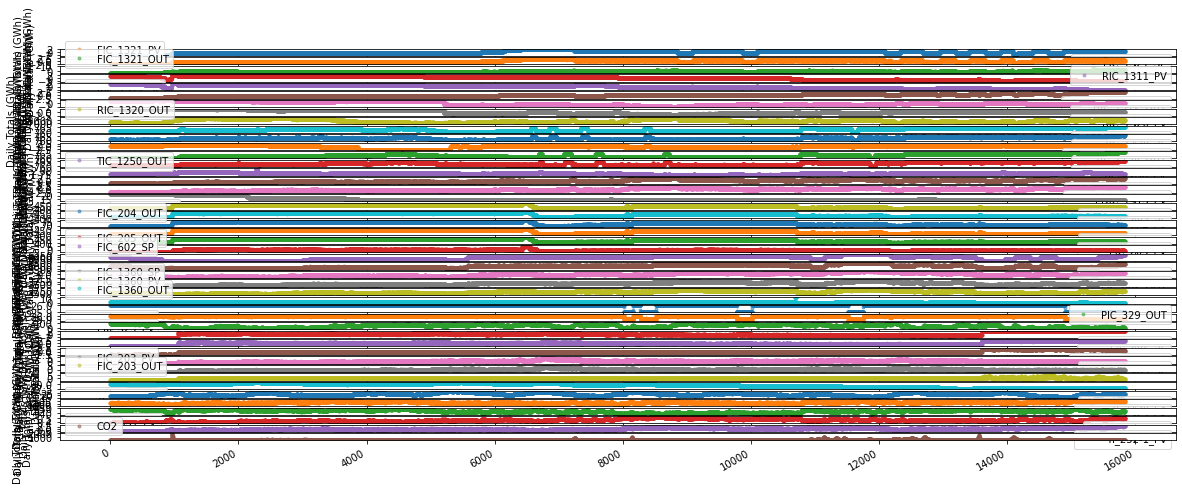

In [69]:
# cols_plot = ['Consumption', 'Solar', 'Wind']

cols_plot = df.columns #['-1-', '-2-', 'out']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

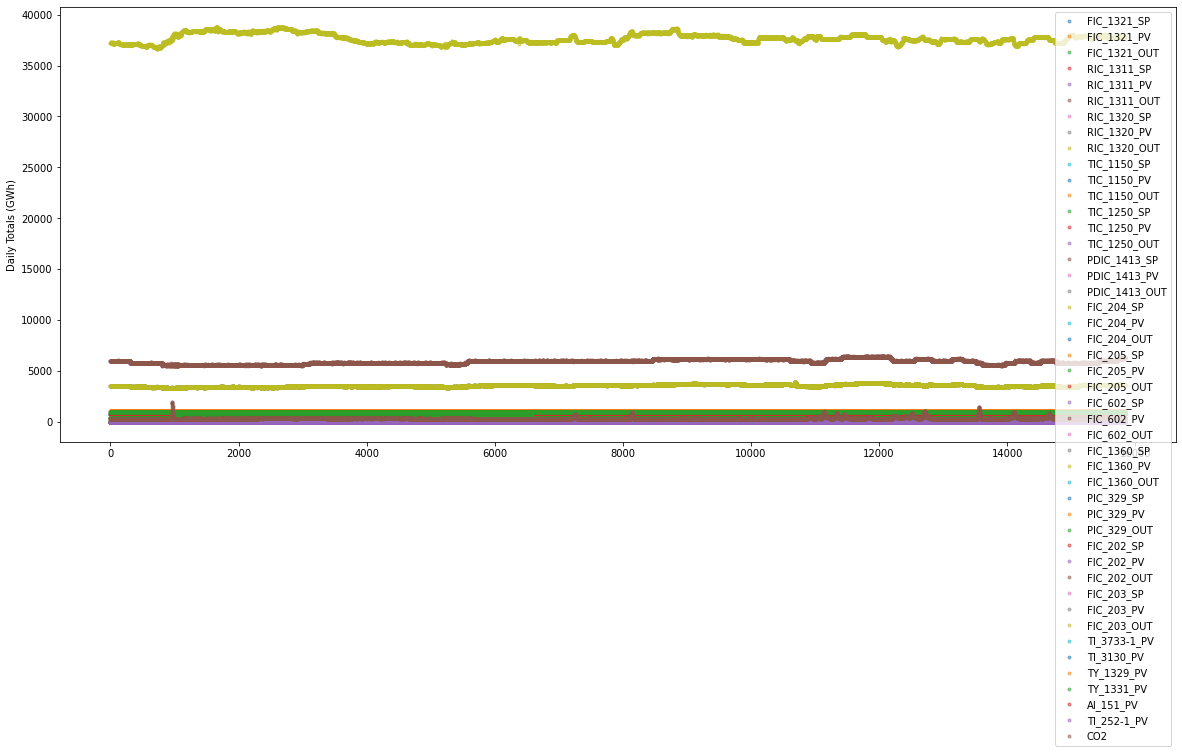

In [70]:
axes = time_series_df.plot(marker='.', alpha=0.5, linestyle='None')
plt.ylabel('Daily Totals (GWh)');

## Can we predict each day's CO2 Production from its past?

### We train on the years 2006 - 2016 and validate on 2017

In [71]:
# CO2_Production = time_series_df['Consumption'].to_numpy()
CO2_Production = time_series_df[df.columns[46]].to_numpy()
print(df.columns[46])
CO2_Production.shape

CO2


(15840,)

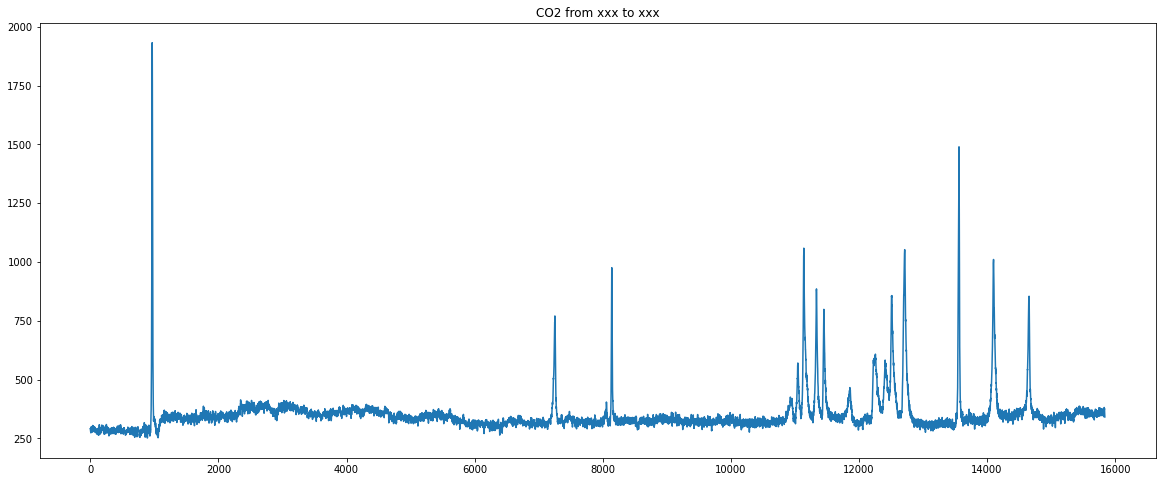

In [72]:
plt.title('CO2 from xxx to xxx')
plt.plot(CO2_Production);

## Statistical Methods directly geared towards forecasting

_Statistical Methods are often favorable: https://twitter.com/togelius/status/1173272424177119233_

* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b#targetText=Time%20series%20forecasting%20is%20the,forecasting%20retail%20sales%20time%20series.
* https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* https://research.fb.com/prophet-forecasting-at-scale/

https://www.statsmodels.org
* https://www.statsmodels.org/stable/examples/index.html#stats
* https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html
* https://www.statsmodels.org/stable/tsa.html



In [73]:
# import statsmodels.api as sm

# decomposition = sm.tsa.seasonal_decompose(time_series_df['out'], model='additive')
# decomposition.plot();

In [74]:
# derived from here: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### How much of the past would we like for each individual prediction?

In [75]:
#@title Prediction from n past days

# https://colab.research.google.com/notebooks/forms.ipynb

n_steps_in = 30 #@param {type:"slider", min:1, max:100, step:1}
n_steps_out = 1

In [76]:
X, Y = split_sequence(CO2_Production, n_steps_in, n_steps_out)
X.shape, Y.shape

((15810, 30), (15810, 1))

In [77]:
X[0], Y[0]

(array([291.2526   , 291.6560274, 288.4671458, 282.8678869, 283.0578785,
        279.0603276, 279.2705556, 282.6337459, 285.2210952, 273.1407455,
        278.0805008, 287.7617428, 296.3162455, 295.9223665, 295.2620416,
        297.8849531, 295.0983466, 298.384669 , 297.9587182, 293.3838301,
        292.6615604, 289.2617869, 290.5853175, 297.4002153, 295.6618972,
        293.9291484, 290.7590182, 292.4253212, 280.0550694, 276.291115 ]),
 array([276.1848923]))

In [78]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(15810, 30, 1)

In [79]:
# we do a special test / train split, 
# we see how well we can predict 2017 as test/validation 

X_train = X[-5840:]
Y_train = Y[-5840:]

X_test = X[:10000]
Y_test = Y[:10000]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5840, 30, 1), (5840, 1), (10000, 30, 1), (10000, 1))

## Baslines

### R2 Metric: MSE and MAE are not speaking

* R^2 score, the closer to 1 the better
* loosely speaking: how much better is this than predicting the constant mean
* 0 would mean just as good
* 1 is perfect
* neg. would mean even worse
* it can become arbitrarily worse

https://en.wikipedia.org/wiki/Coefficient_of_determination


### Rolling mean baseline

In [80]:
def rolling_mean_baseline(history):
  return np.mean(history, axis=1)

In [81]:
Y_pred_baseline_rolling = rolling_mean_baseline(X)
Y_pred_baseline_rolling.shape

(15810, 1)

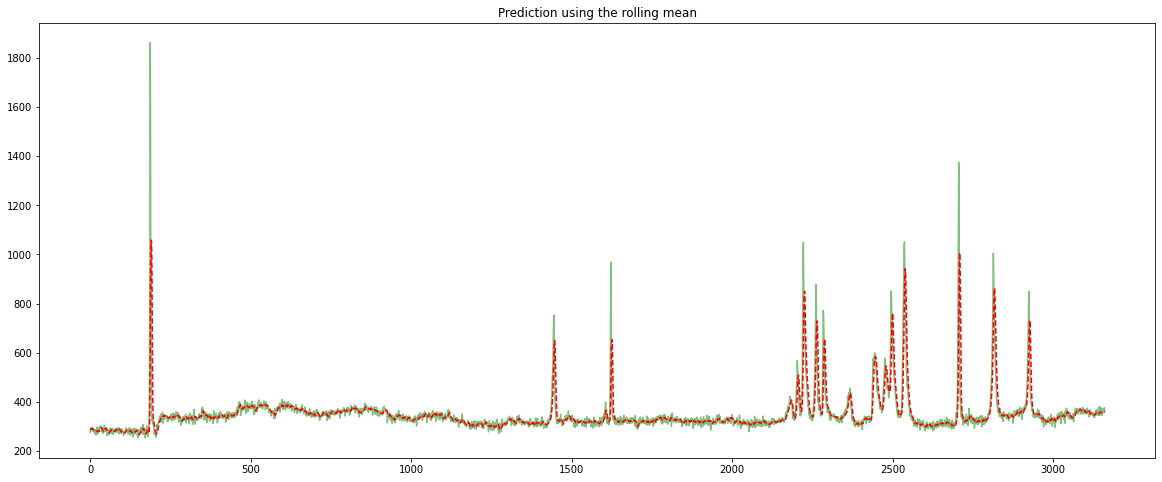

In [83]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(CO2_Production[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_rolling[::stride], color='r', ls='dashed')

plt.title('Prediction using the rolling mean');


In [84]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_rolling)

0.5289391566280859

### Baseline: Previous Value

In [85]:
def previous_value_baseline(history):
  return history[:, -1]

In [86]:
Y_pred_baseline_previous_value = previous_value_baseline(X)
Y_pred_baseline_previous_value.shape

(15810, 1)

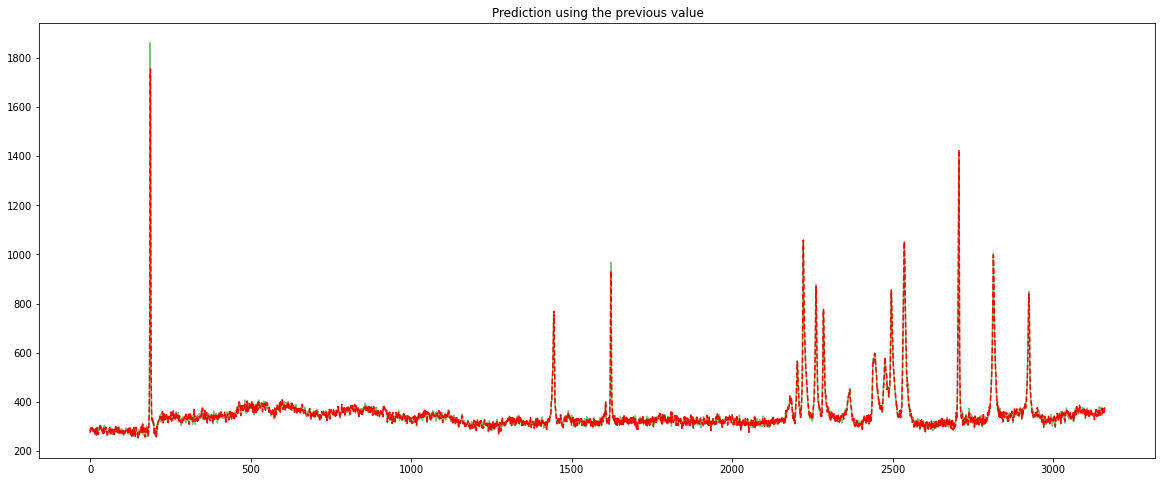

In [88]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(CO2_Production[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[::stride], color='r', ls='dashed')
plt.title('Prediction using the previous value');

### This looks good at first sight, but wait for the R2 score

It is (obviously) always off by one

In [89]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_previous_value)

0.9875445505827974

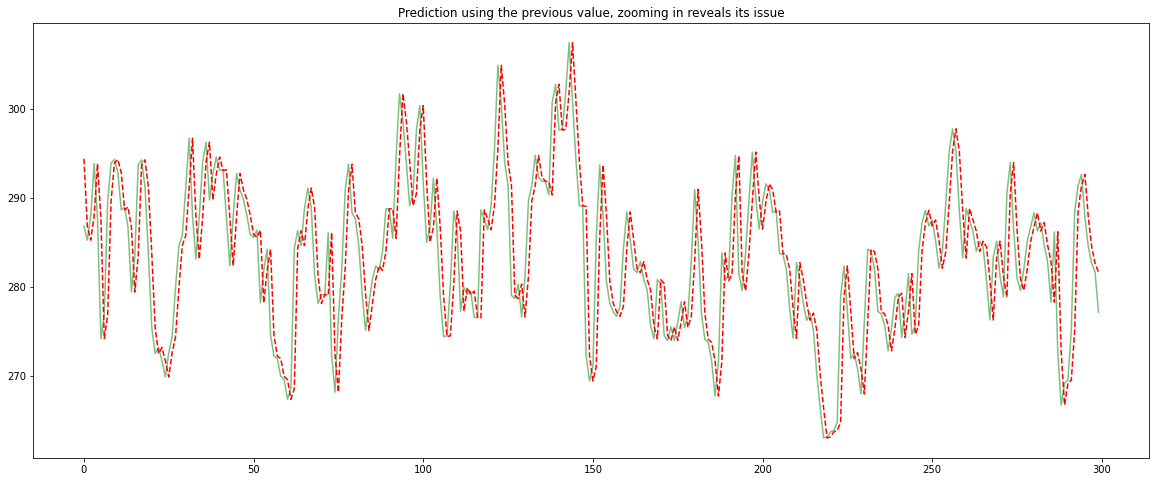

In [91]:
# this gets really crowded, using a stride, makes it more readable
stride = 1
# too crwoded, zoom in
window_start = 300
window_end = 600

plt.plot(CO2_Production[n_steps_in+window_start:n_steps_in+window_end:stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[window_start:window_end:stride], color='r', ls='dashed')

plt.title('Prediction using the previous value, zooming in reveals its issue');

## Prediction using RNNs and TensorFlow

### Can we beat an r2 score around .20?

In [92]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [93]:
import tensorflow as tf
print(tf.__version__)

2.4.1


### Just for the reference, what GPU are we running on?

In [94]:
# What kind of GPU are we running on
!nvidia-smi

Sun Apr 25 20:51:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [95]:
# adapted from https://stackoverflow.com/a/42351397/1756489 and ported to TF 2
# https://keras.io/metrics/#custom-metrics

# only works on tensors while training, use sklearn version when using on numpy arrays

def r2_metric(y_true, y_pred):
  total_error = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
  R_squared = tf.subtract(1.0, tf.divide(unexplained_error, total_error))
  
  return R_squared

### Training our model

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

model = Sequential()

# two layer model, known to work well
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))

# trains faster, but also works
# model.add(GRU(256, activation='relu', input_shape=(n_steps_in, n_features)))

# one layer SimpleRNN seems to be enough for this data set
model.add(SimpleRNN(256, activation='relu', input_shape=(n_steps_in, n_features)))

# horrible results
# model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(64, activation='relu'))

# optional regularization
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# combines final outputs from RNN into continous output
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               66048     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [97]:
%%time

batch_size = 32
epochs=25

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    verbose=1)

Epoch 1/25
183/183 [==============================] - 9s 30ms/step - loss: 13750.7755 - r2_metric: 0.1025 - val_loss: 211.0861 - val_r2_metric: -0.1567
Epoch 2/25
183/183 [==============================] - 5s 27ms/step - loss: 267.6741 - r2_metric: 0.9761 - val_loss: 194.7935 - val_r2_metric: -0.2666
Epoch 3/25
183/183 [==============================] - 5s 27ms/step - loss: 226.6961 - r2_metric: 0.9734 - val_loss: 168.5821 - val_r2_metric: -0.0465
Epoch 4/25
183/183 [==============================] - 5s 28ms/step - loss: 194.7526 - r2_metric: 0.9738 - val_loss: 155.4485 - val_r2_metric: 0.0430
Epoch 5/25
183/183 [==============================] - 5s 27ms/step - loss: 227.5797 - r2_metric: 0.9770 - val_loss: 146.6919 - val_r2_metric: 0.0969
Epoch 6/25
183/183 [==============================] - 5s 27ms/step - loss: 191.4683 - r2_metric: 0.9772 - val_loss: 133.5170 - val_r2_metric: 0.1487
Epoch 7/25
183/183 [==============================] - 5s 27ms/step - loss: 151.7855 - r2_metric: 0.98

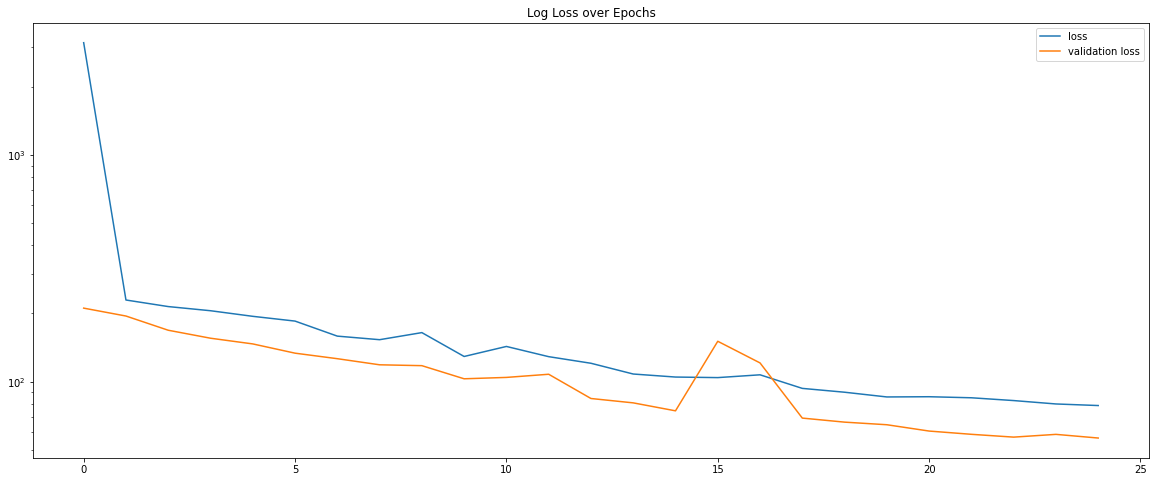

In [98]:
plt.yscale('log')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Log Loss over Epochs')

plt.legend(['loss', 'validation loss']);

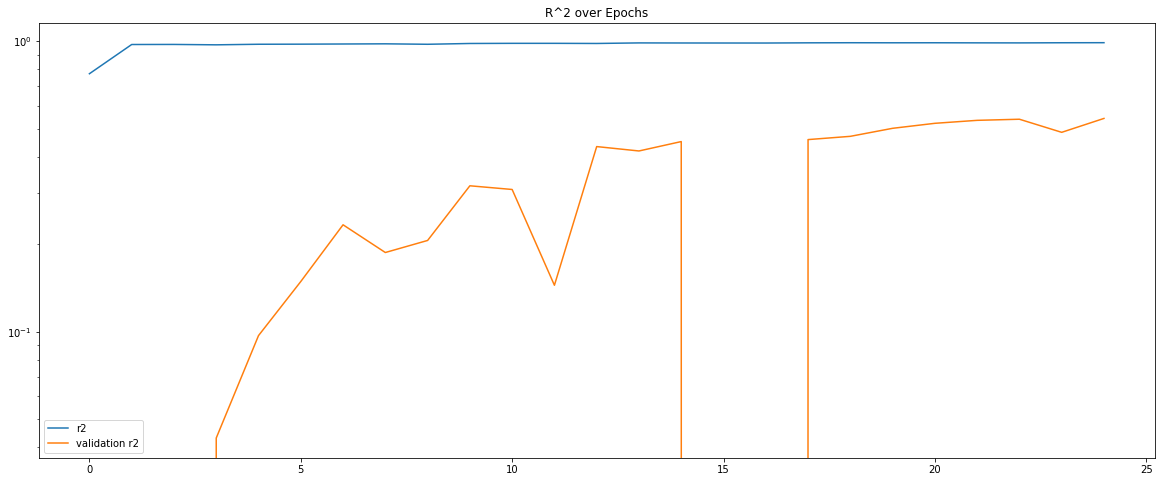

In [99]:
plt.yscale('log')
plt.plot(history.history['r2_metric'])
plt.plot(history.history['val_r2_metric'])
plt.title('R^2 over Epochs')

plt.legend(['r2', 'validation r2']);

In [100]:
model.evaluate(X, Y, batch_size=batch_size, verbose=0)

[62.23799514770508, 0.5119732022285461]

### R2 for all data

In [101]:
from sklearn.metrics import r2_score

Y_pred = model.predict(X)
r2_score(Y, Y_pred)

0.9921225553945427

### R2 for training data

In [102]:
Y_train_pred = model.predict(X_train)
r2_score(Y_train, Y_train_pred)

0.9946962648849298

### R2 for validation data

In [103]:
Y_test_pred = model.predict(X_test)
r2_score(Y_test, Y_test_pred)

0.9858112431725232

## Let's plot predicted and true over each other

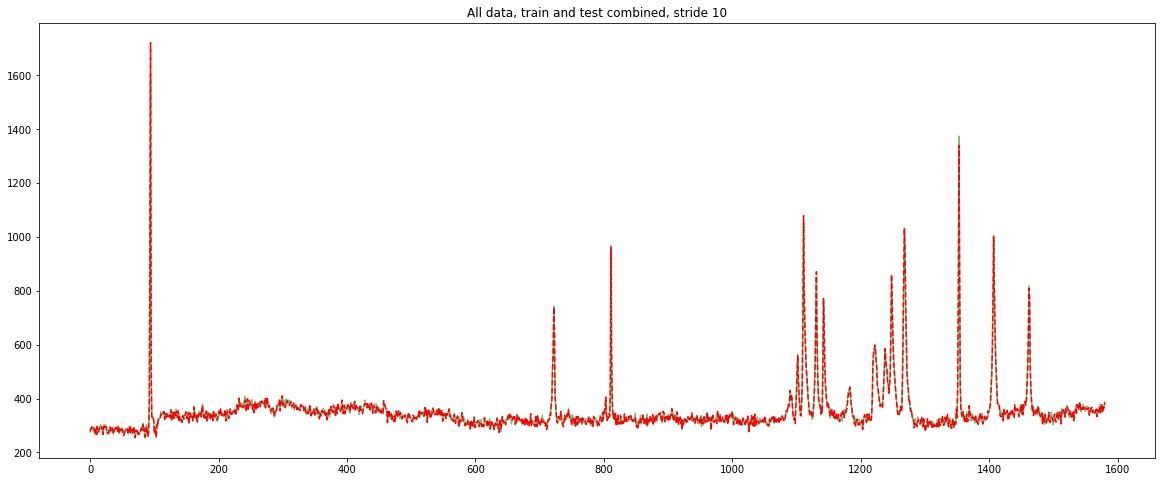

In [104]:
# this gets really crowded, using a stride, makes it more readable
stride = 10

# for the first 90 days we have no prediction, so get rid of them
plt.plot(CO2_Production[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred[::stride], color='r', ls='dashed')

plt.title('All data, train and test combined, stride 10');


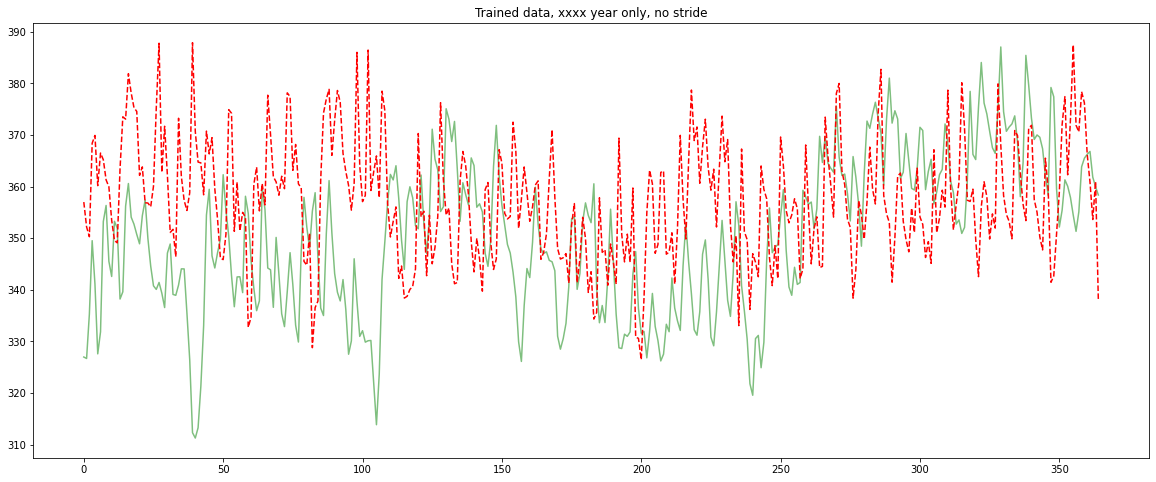

In [105]:
stride = 1


plt.plot(CO2_Production[-2 * 365:-365:stride], alpha=0.5, color='g')
plt.plot(Y_train_pred[-365::stride], color='r', ls='dashed')

plt.title('Trained data, xxxx year only, no stride');


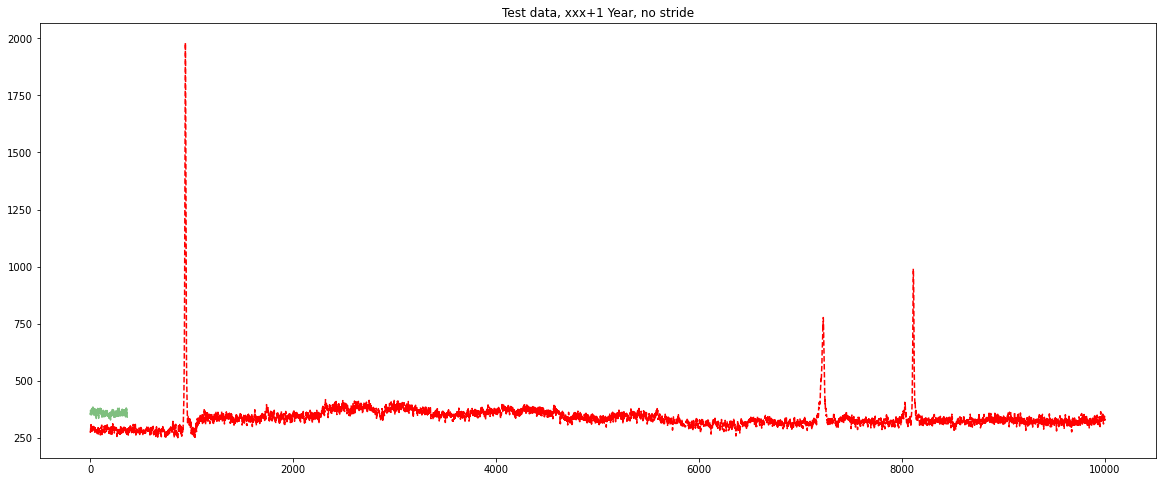

In [106]:
stride = 1


plt.plot(CO2_Production[-365::stride], alpha=0.5, color='g')
plt.plot(Y_test_pred[::stride], color='r', ls='dashed')

plt.title('Test data, xxx+1 Year, no stride');


## Observation / Wrap-Up

### overall a pretty good result
* r2 score is pretty promising
* defintely improved over baseline
* no domain knowledge necessary

### no dramatic difference between training and test data
* neither in metrices
* nor in visual inspection

### peaks and valleys are underestimated very often
* but often the most interesting part
* this seems to be a common problem in time series prediction
* it gets better we train the model for longer
* also when we increase its capacity
* on the other hand this might counter regularization


## Next Steps
  
### make use of seasonal decomposition
* predict each of the components
  * trend should be pretty easy
  * residual shows clear spices on national holidays
  * remove them
  * the results might be noise only
  * but maybe it is not, train a model on it to check
  
### have a more powerful statistical baseline
* Use more powerful statistical models
  * https://www.statsmodels.org/stable/tsa.html
  * http://www.statsmodels.org/dev/tsa.html
  * http://www.statsmodels.org/dev/vector_ar.html
* MSBVAR (Markov-Switching, Bayesian, Vector Autoregression Models) might beat our model, but
  * needs a lot of modelling 
  * does not seem readily available in the Python world (in R it would be)
  
